# Reperimento dell'Informazione - Homework 1
**Studente:** Federico Sergio
**Matricola:** 1210684

Di seguito sono riportati tutti i dati utilizzati per la valutazione, con i valori numerici e i grafici relativi.

In [21]:
import pandas as pd
import numpy as np

def importFile(path):
    file = str(path)
    dataframe = pd.read_csv(file, sep=',', index_col=0)
    return dataframe

def extractEval(dataframe, model, topic):
    Map = dataframe.loc['map']
    Rprec = dataframe.loc['Rprec']
    P_10 = dataframe.loc['P_10']
    
    #creating the complete dataframe with our measures
    tab = pd.merge(Map, Rprec, how='inner', on=['Topic'])
    tab = pd.merge(tab, P_10, how='inner', on= ['Topic'])
    tab.insert(0, 'Model', model)
    
    #renaming...
    tab = tab.rename({'Val_x':'map', 'Val_y':'Rprec', 'Val':'P_10'}, axis='columns')
        
    if (topic == 'overall'):
        measures = tab.loc[(tab['Topic']=='all')].drop(['Topic'], axis=1).reset_index(drop=True)
    if (topic == 'single'):
        measures = tab.loc[(tab['Topic']!='all')]
    
    return measures

data1=importFile("Evaluations/BM25_Stoplist-Stemmer.csv")
data2=importFile("Evaluations/TFIDF_Stoplist-Stemmer.csv")
data3=importFile("Evaluations/BM25_null-Stemmer.csv")
data4=importFile("Evaluations/TFIDF_null-null.csv")

#extracting global data 
res1 = extractEval(data1, 'BM25-Stoplist and PorterStemmer', 'overall') 
res2 = extractEval(data2, 'TFIDF-Stoplist and PorterStemmer', 'overall')
res3 = extractEval(data3, 'BM25-No Stoplist and PorterStemmer', 'overall')
res4 = extractEval(data4, 'TFIDF-No Stoplist and No PorterStemmer', 'overall')

res = pd.concat([res1, res2, res3 ,res4]).reset_index(drop=True)

print("Risultati della misurazione in ordine per modello e tecniche di indicizzazione:\n")
print(res)

Risultati della misurazione in ordine per modello e tecniche di indicizzazione:

                                    Model     map   Rprec    P_10
0         BM25-Stoplist and PorterStemmer  0.2125  0.2705  0.4820
1        TFIDF-Stoplist and PorterStemmer  0.2123  0.2725  0.4780
2      BM25-No Stoplist and PorterStemmer  0.1245  0.1701  0.3020
3  TFIDF-No Stoplist and No PorterStemmer  0.1876  0.2485  0.4260


In [2]:
#extracting every single measure
res1 = (extractEval(data1, 'BM25-Stoplist and PorterStemmer', 'single'))
res2 = (extractEval(data2, 'TFIDF-Stoplist and PorterStemmer', 'single'))
res3 = (extractEval(data3, 'BM25-No Stoplist and PorterStemmer', 'single'))
res4 = (extractEval(data4, 'TFIDF-No Stoplist and No PorterStemmer', 'single'))

#creating the main table 
res_tot = pd.concat([res1,res2,res3,res4])

### Visualizzazione dei risultati - Plots

In questa sezione sono riportati per ciascuna misura i 4 grafici relativi ai diversi tipi di modello/indicizzazione.

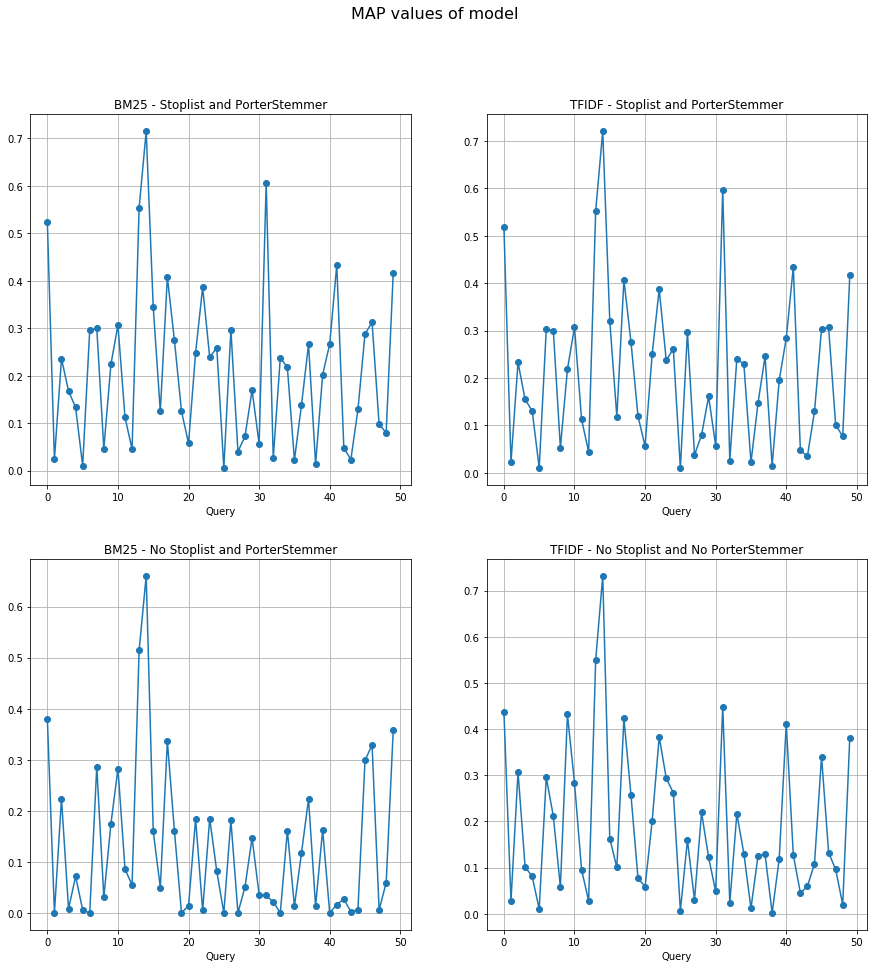

In [14]:
import matplotlib.pyplot as plt

#changing values' types (needed to plot)
res_tot['map'] = res_tot['map'].astype(float)
res_tot['Rprec'] = res_tot['Rprec'].astype(float)
res_tot['P_10'] = res_tot['P_10'].astype(float)

res1['map'] = res1['map'].astype(float)
res2['map'] = res2['map'].astype(float)
res3['map'] = res3['map'].astype(float)
res4['map'] = res4['map'].astype(float)


fig = plt.figure(figsize=(15,15))
fig.suptitle('MAP values of model', fontsize=16)

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(res1['map'],marker='o')
ax1.grid(True)
ax1.set_title('BM25 - Stoplist and PorterStemmer')
ax1.set_xlabel('Query')

ax2.plot(res2['map'],marker='o')
ax2.grid(True)
ax2.set_title('TFIDF - Stoplist and PorterStemmer')
ax2.set_xlabel('Query')

ax3.plot(res3['map'],marker='o')
ax3.grid(True)
ax3.set_title('BM25 - No Stoplist and PorterStemmer')
ax3.set_xlabel('Query')

ax4.plot(res4['map'],marker='o')
ax4.grid(True)
ax4.set_title('TFIDF - No Stoplist and No PorterStemmer')
ax4.set_xlabel('Query')

plt.show()

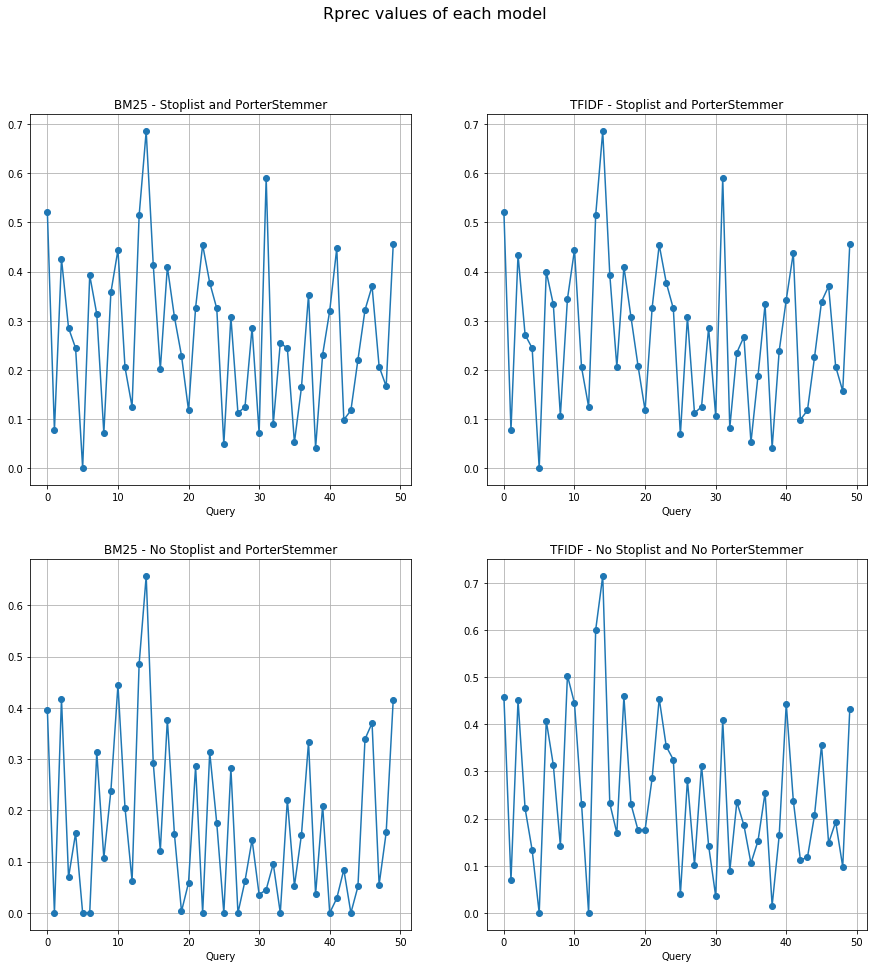

In [4]:
#changing type to plot
res1['Rprec'] = res1['Rprec'].astype(float)
res2['Rprec'] = res2['Rprec'].astype(float)
res3['Rprec'] = res3['Rprec'].astype(float)
res4['Rprec'] = res4['Rprec'].astype(float)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Rprec values of each model', fontsize=16)

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(res1['Rprec'],marker='o')
ax1.grid(True)
ax1.set_title('BM25 - Stoplist and PorterStemmer')
ax1.set_xlabel('Query')

ax2.plot(res2['Rprec'],marker='o')
ax2.grid(True)
ax2.set_title('TFIDF - Stoplist and PorterStemmer')
ax2.set_xlabel('Query')

ax3.plot(res3['Rprec'],marker='o')
ax3.grid(True)
ax3.set_title('BM25 - No Stoplist and PorterStemmer')
ax3.set_xlabel('Query')

ax4.plot(res4['Rprec'],marker='o')
ax4.grid(True)
ax4.set_title('TFIDF - No Stoplist and No PorterStemmer')
ax4.set_xlabel('Query')

plt.show()

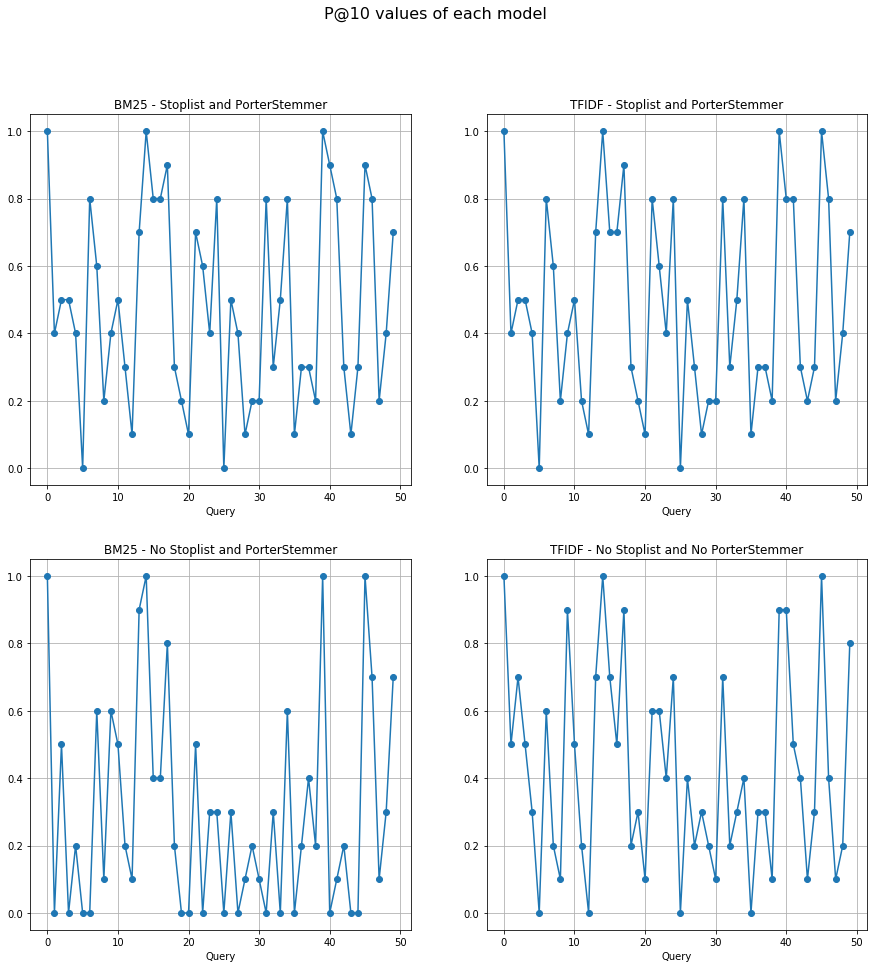

In [5]:
#changing type to plot
res1['P_10'] = res1['P_10'].astype(float)
res2['P_10'] = res2['P_10'].astype(float)
res3['P_10'] = res3['P_10'].astype(float)
res4['P_10'] = res4['P_10'].astype(float)

fig = plt.figure(figsize=(15,15))
fig.suptitle('P@10 values of each model', fontsize=16)

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(res1['P_10'],marker='o')
ax1.grid(True)
ax1.set_title('BM25 - Stoplist and PorterStemmer')
ax1.set_xlabel('Query')

ax2.plot(res2['P_10'],marker='o')
ax2.grid(True)
ax2.set_title('TFIDF - Stoplist and PorterStemmer')
ax2.set_xlabel('Query')

ax3.plot(res3['P_10'],marker='o')
ax3.grid(True)
ax3.set_title('BM25 - No Stoplist and PorterStemmer')
ax3.set_xlabel('Query')

ax4.plot(res4['P_10'],marker='o')
ax4.grid(True)
ax4.set_title('TFIDF - No Stoplist and No PorterStemmer')
ax4.set_xlabel('Query')

plt.show()

## Boxplot

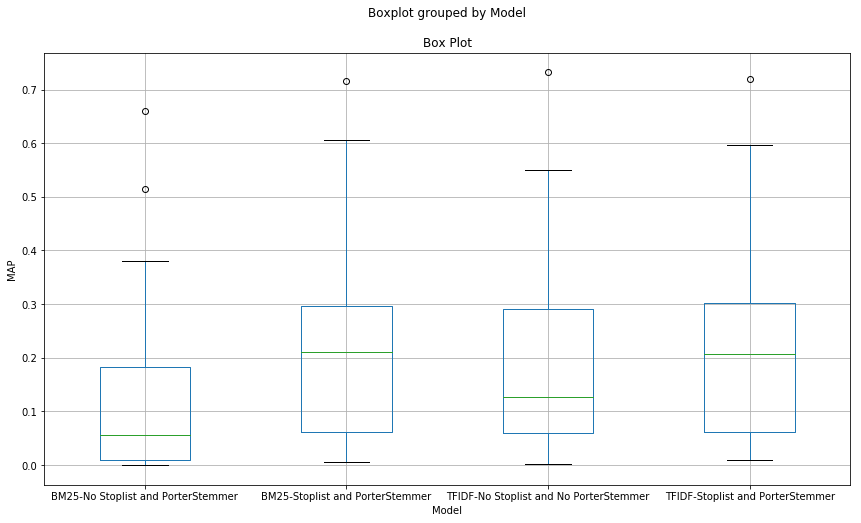

In [6]:
#Create a boxplot
res_tot.boxplot('map', by='Model', figsize=(14, 8))
plt.title("Box Plot")
plt.ylabel("MAP")
plt.xlabel("Model")
plt.show()

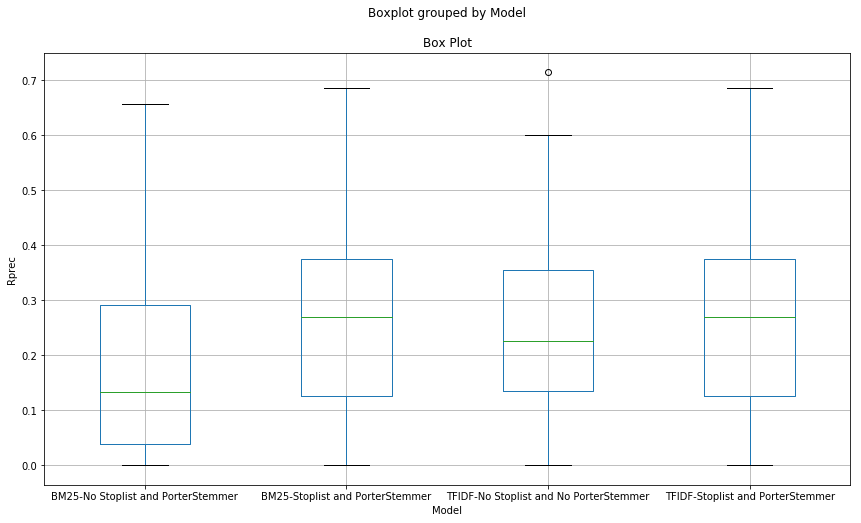

In [7]:
#Create a boxplot
res_tot.boxplot('Rprec', by='Model', figsize=(14, 8))
plt.title("Box Plot")
plt.ylabel("Rprec")
plt.xlabel("Model")
plt.show()

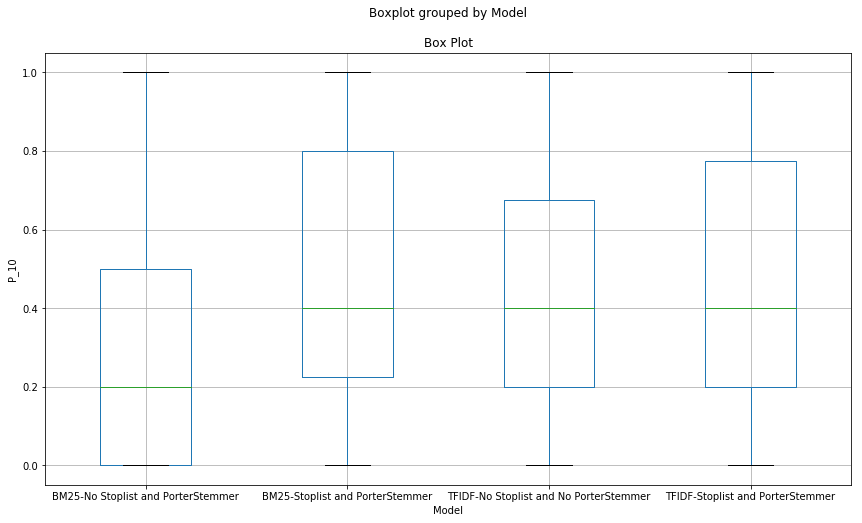

In [8]:
#Create a boxplot
res_tot.boxplot('P_10', by='Model', figsize=(14, 8))
plt.title("Box Plot")
plt.ylabel("P_10")
plt.xlabel("Model")
plt.show()

## ANOVA 1-way

In [9]:
from scipy import stats

#ANOVA MAP
F, p = stats.f_oneway(res1['map'], res2['map'], res3['map'], res4['map'])
print("p-value e F-value MAP: ")
print("F-value: " + str(F))
print("p-value: " + str(p))

#ANOVA Rprec
F, p = stats.f_oneway(res1['Rprec'], res2['Rprec'], res3['Rprec'],res4['Rprec'])
print("\np-value e F-value Rprec: ")
print("F-value: " + str(F))
print("p-value: " + str(p))

#ANOVA P_10
F, p = stats.f_oneway(res1['P_10'], res2['P_10'], res3['P_10'],res4['P_10'])
print("\np-value e F-value P_10: ")
print("F-value: " + str(F))
print("p-value: " + str(p))

p-value e F-value MAP: 
F-value: 3.278594613256783
p-value: 0.022075545923528662

p-value e F-value Rprec: 
F-value: 4.560140109254023
p-value: 0.00411143680902894

p-value e F-value P_10: 
F-value: 3.8806068502793134
p-value: 0.010032554063785504


## Test di Tukey

In [13]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

#Tukey Map
comp = MultiComparison(res_tot['map'],res_tot['Model'])
tukey_map = comp.tukeyhsd()
print('Tukey\'s Test on MAP values')
print(tukey_map.summary())

#Tukey Rprec
comp = MultiComparison(res_tot['Rprec'],res_tot['Model'])
tukey_rprec = comp.tukeyhsd()
print('Tukey\'s Test on Rprec values')
print(tukey_rprec.summary())

#Tukey P_10
comp = MultiComparison(res_tot['P_10'],res_tot['Model'])
tukey_p_10 = comp.tukeyhsd()
print('Tukey\'s Test on P_10 values')
print(tukey_p_10.summary())

Tukey's Test on MAP values
                             Multiple Comparison of Means - Tukey HSD,FWER=0.05                             
                group1                                 group2                 meandiff  lower  upper  reject
------------------------------------------------------------------------------------------------------------
  BM25-No Stoplist and PorterStemmer      BM25-Stoplist and PorterStemmer      0.0881   0.004  0.1721  True 
  BM25-No Stoplist and PorterStemmer   TFIDF-No Stoplist and No PorterStemmer  0.0632  -0.0208 0.1472 False 
  BM25-No Stoplist and PorterStemmer      TFIDF-Stoplist and PorterStemmer     0.0878   0.0038 0.1718  True 
   BM25-Stoplist and PorterStemmer     TFIDF-No Stoplist and No PorterStemmer -0.0249  -0.1089 0.0591 False 
   BM25-Stoplist and PorterStemmer        TFIDF-Stoplist and PorterStemmer    -0.0003  -0.0843 0.0838 False 
TFIDF-No Stoplist and No PorterStemmer    TFIDF-Stoplist and PorterStemmer     0.0246  -0.0594 0.1087

Si riportano infine i grafici rappresentanti i valori ottenuti tramite il Tukey's test, sempre suddivisi tra MAP, Rprec e P_10:

Tukey's Test on MAP values


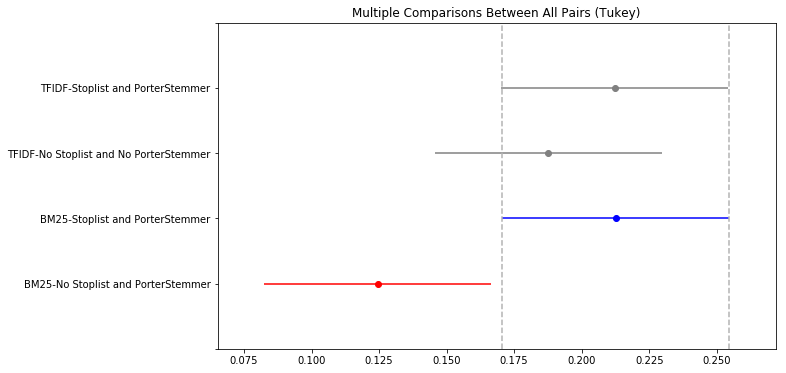

In [15]:
print('Tukey\'s Test on MAP values')
tukey_map.plot_simultaneous(comparison_name="BM25-Stoplist and PorterStemmer")
plt.show()

Tukey's Test on Rprec values


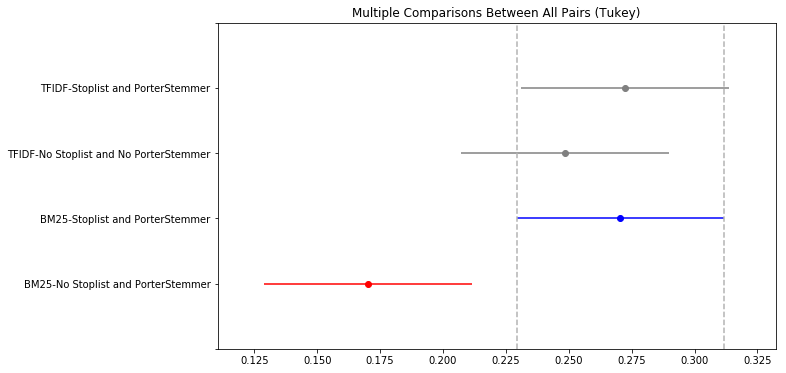

In [16]:
print('Tukey\'s Test on Rprec values')
tukey_rprec.plot_simultaneous(comparison_name="BM25-Stoplist and PorterStemmer")
plt.show()

Tukey's Test on P_10 values


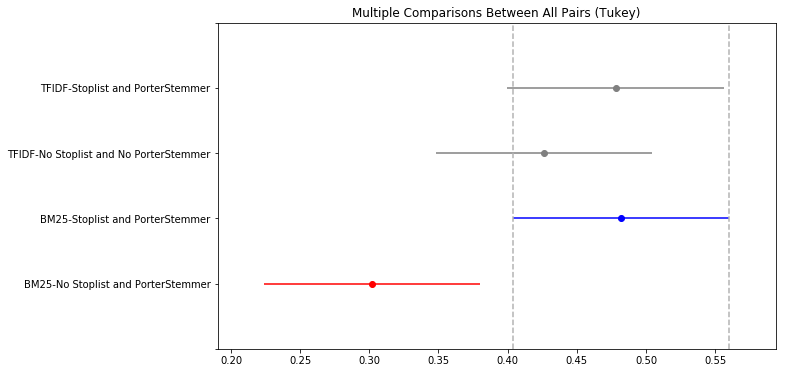

In [17]:
print('Tukey\'s Test on P_10 values')
tukey_p_10.plot_simultaneous(comparison_name="BM25-Stoplist and PorterStemmer")
plt.show()

I risultati ottenuti sia numericamente che tramite rappresentazione grafica mostrano come il modello BM25 che non fa uso di Stoplist abbia una media nettamente diversa dagli altri.